<a href="https://colab.research.google.com/github/tortas/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
3023,50,9400.0,5,250,2.2,0,1,2005,2
3203,33,18100.0,3,0,1.6,3,1,2015,0
7346,55,7200.0,3,56,3.0,2,1,1998,2
6593,74,18999.0,0,95,2.0,3,1,2011,1
7366,77,9500.0,1,62,1.2,0,1,2011,0
8253,26,10000.0,3,45,2.4,3,1,2014,0
8267,59,10200.0,5,149,1.5,0,1,2013,0
1648,77,2999.0,4,239,1.9,0,0,2003,0
2516,74,2350.0,1,211,1.3,3,1,1987,0
4841,5,4700.0,3,200,2.5,3,1,1995,2


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
X = df.drop(columns='price')
y = df['price']

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [5]:
print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8495, 8) 

(6796, 8)
(1699, 8)
(6796,)
(1699,)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [6]:
mr_model = LinearRegression()
mr_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [7]:
print('Intercept: ', mr_model.intercept_)
print('Coefficients: ', mr_model.coef_)

Intercept:  -2269355.0772314165
Coefficients:  [  -35.16726588 -1770.98509064   -40.26859658   273.03540784
 -1111.08031708  4535.06013378  1140.73124767  8292.04613874]


## 1.5 Use the test data to make predictions.

In [0]:
y_test_predict = mr_model.predict(X_test)

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [9]:
RMSE = np.sqrt(mean_squared_error(Y_test, y_test_predict))
print('RMSE is {}'.format(RMSE))
R2 = r2_score(Y_test, y_test_predict)
print('R^2 is {}'.format(R2))

RMSE is 21394.43524600266
R^2 is 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

The coefficient corresponding to the 'year' feature can be interpreted as how much the price can increase for each increase in the 'year' feature for otherwise similar cars.

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
ln_y = np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

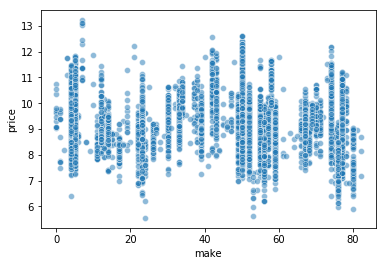

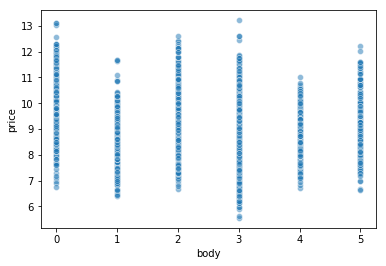

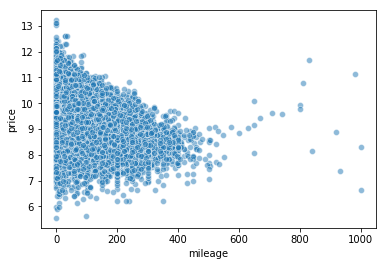

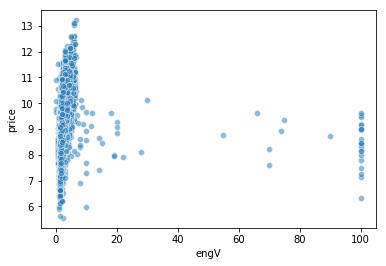

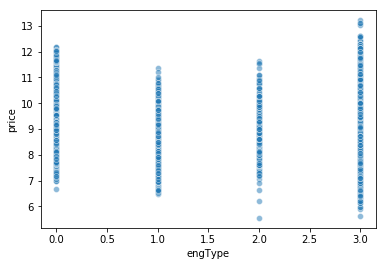

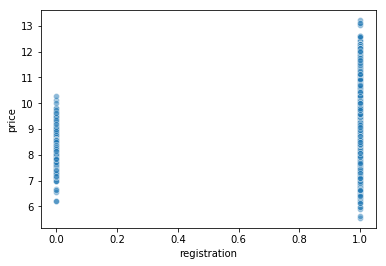

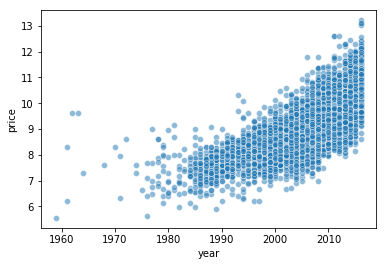

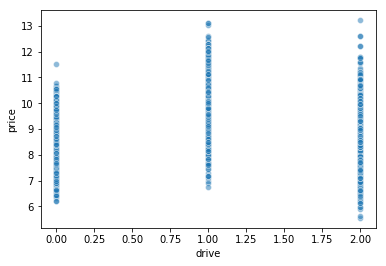

In [11]:
# Plot scatterplots
features = df.columns.drop('price')
for feature in features:
    sns.scatterplot(x=feature, y=ln_y, data=df, alpha=0.5)
    plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
df['year_squared'] = df['year']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,ln_y,test_size=.2, random_state=42)
lp_model = LinearRegression()
lp_model.fit(X_train,Y_train)
print('Intercept: ', lp_model.intercept_)
print('Coefficients: ', lp_model.coef_)
y_test_predict = lp_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(Y_test, y_test_predict))
print('RMSE is {}'.format(RMSE))
R2 = r2_score(Y_test, y_test_predict)
print('R^2 is {}'.format(R2))

Intercept:  -183.02593585249053
Coefficients:  [-1.52681064e-03 -9.35510337e-02 -2.96468789e-05  8.70319193e-03
 -5.80216535e-02  7.31811098e-01  9.55180643e-02  3.89875953e-01]
RMSE is 0.5845598209790605
R^2 is 0.6434442979521522


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

The coefficients are interpreted differently than OLS because they represent changes in percentages.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [14]:
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [15]:
print('R^2', tree.score(X_test, Y_test))

R^2 0.8674882539127964


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [18]:
sm_model = sm.OLS(ln_y, sm.add_constant(X))
results = sm_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2040.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        16:25:43   Log-Likelihood:                -7167.0
No. Observations:                8495   AIC:                         1.435e+04
Df Residuals:                    8486   BIC:                         1.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -181.8341      2.144    -84.810   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [19]:
vif = [variance_inflation_factor(sm.add_constant(X).values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


make            123262.013632
body                 1.059149
mileage              1.158326
engV                 1.549610
engType              1.009321
registration         1.141183
year                 1.091892
drive                1.458528
dtype: float64

Based on the rule of thumb that a vif > 10 means that it is likely that two X variables are highly correlated, I would say that we do have multicollinearity problems with the make feature.